# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,554,113,48,98,208,62,9,203,33,23,151,216,613,183,64,17,29,193,204
1,399,87,42,64,150,64,10,133,50,18,141,157,265,159,67,7,0,193,201
2,421,98,48,101,195,61,11,207,31,23,152,227,650,193,71,5,7,189,196
3,518,85,40,75,137,56,7,152,44,19,134,173,339,160,76,7,16,182,187
4,481,104,54,91,209,67,11,218,31,24,170,223,697,196,74,4,21,187,196
5,838,95,43,76,142,57,10,151,44,19,149,173,339,159,71,2,23,187,200
6,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
7,38,106,53,98,176,54,10,216,31,24,171,235,691,218,74,1,9,187,197
8,647,85,38,75,132,54,7,147,46,19,131,171,318,145,75,7,25,183,188
9,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.876138,94.020036,45.056466,82.438980,169.735883,61.766849,8.672131,169.834244,40.757741,20.668488,148.417122,189.358834,445.300546,175.38980,72.624772,6.568306,12.637523,188.857923,195.584699
std,244.930996,8.279645,6.202667,16.182874,33.718638,8.179349,4.958033,33.800237,7.966717,2.633191,14.644291,31.625440,179.194362,32.36326,7.683130,5.022339,9.096088,6.176970,7.619763
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,321.000000,151.00000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,421.000000,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.00000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,632.000000,100.000000,51.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,218.000000,604.000000,200.00000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,257.000000,61.000000,28.000000,188.000000,285.000000,966.000000,268.00000,127.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Отмасштабируем данные, чтобы сделать среднее и СКО по каждой фиче одинаковыми

In [6]:
from sklearn.preprocessing import scale

X_train_s = scale(X_train)
X_test_s = scale(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt

In [32]:
param_grid = {
    'penalty': [None, 'l2', 'l1'],
    'C': [0.1, 1, 5, 10],
    'fit_intercept': [False, True],
    'multi_class': ['multinomial'],
    'solver': ['saga'],
    'tol': [1e-3],
    'max_iter': [500]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, n_jobs = 8)

In [33]:
grid_search.fit(X_train_s, y_train)
results_lr = pd.DataFrame(grid_search.cv_results_)
#results_lr.to_csv('results_lr.csv')
grid_search.best_params_

{'C': 5,
 'fit_intercept': True,
 'max_iter': 500,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.001}

f1 score: 0.784230942222369
accuracy: 0.7912457912457912


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

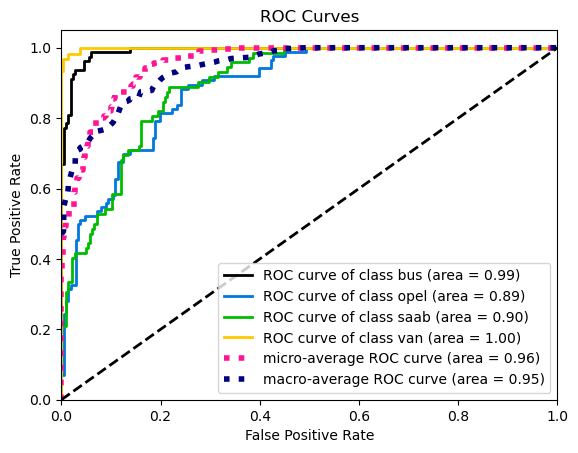

In [35]:
lr_model = LogisticRegression(**grid_search.best_params_)
lr_model.fit(X_train_s, y_train)
y_pred = lr_model.predict(X_test_s)
y_proba = lr_model.predict_proba(X_test_s)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'f1 score: {f1}')
print(f'accuracy: {accuracy}')

skplt.metrics.plot_roc(y_test, y_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Variance: 9.607379449116486 3.0237496595704396 1.6755040414783675 1.193122993859991 0.9930370892311254 0.9010559955638349 0.5726160363031899 0.38927541105803726 0.23141952344507866 0.1608853287243704 0.09039607577940283 0.0618367690149851 0.04372084484192609 0.03386608765416157 0.02219422545440887 0.01632138788133499 0.011882505703791516 0.006035935240253186 0.00037217292553242293


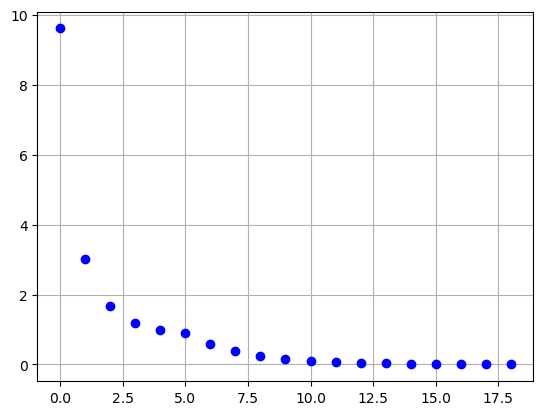

In [40]:
pca = PCA()
pca.fit(X_train_s)
variance = pca.explained_variance_
print("Variance:", *variance)
plt.plot(variance, 'bo')
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
pca = PCA(n_components=9)
pca.fit(X_test_s)
pca.fit(X_train_s)

X_train_pca = pca.transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

Было выбрано 9 компонент, т.к. дисперсия остальных много меньше.
Данные снова надо отмасштабировать, чтобы привести к одинаковым средним и СКО.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [100]:
estimators = [('scaler1', StandardScaler()),
              ('pca', PCA(n_components=9)),
              ('scaler2', StandardScaler()),
              ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))]

pipe_search = Pipeline(estimators)

param_grid = {
    'log_reg__penalty': [None, 'l1', 'l2'],
    'log_reg__C': [0.1, 1, 5, 10],
    'log_reg__fit_intercept': [False, True],
    'log_reg__max_iter': [250, 500]
}

grid_search = GridSearchCV(pipe_search, param_grid, n_jobs = 8)

grid_search.fit(X_train, y_train)
results_lr = pd.DataFrame(grid_search.cv_results_)
#results_lr.to_csv('results_lr.csv')
grid_search.best_params_

{'log_reg__C': 0.1,
 'log_reg__fit_intercept': False,
 'log_reg__max_iter': 250,
 'log_reg__penalty': 'l2'}

f1 score: 0.6583422322976049
accuracy: 0.6767676767676768


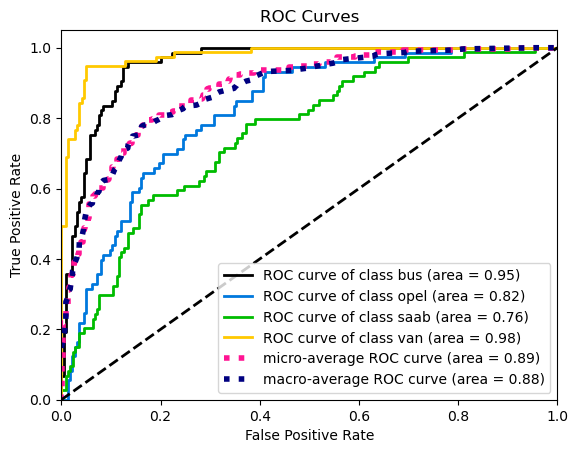

In [102]:
estimators = [('scaler1', StandardScaler()),
              ('pca', PCA(n_components=9)),
              ('scaler2', StandardScaler()),
              ('log_reg', LogisticRegression(C = 0.1, fit_intercept = False, penalty = 'l2',
                                            multi_class='multinomial', solver='saga',
                                            tol=1e-3, max_iter=250))]

pipe1 = Pipeline(estimators)
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test)
y_proba = pipe1.predict_proba(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'f1 score: {f1}')
print(f'accuracy: {accuracy}')

skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
estimators = [('scaler1', StandardScaler()),
              ('pca', PCA(n_components=9)),
              ('scaler2', StandardScaler()),
              ('tree_cl', DecisionTreeClassifier())]

pipe_search = Pipeline(estimators)

param_grid = {
    'tree_cl__max_depth': [2, 4, 8, 16, 32, 64, 128, 256]
}

grid_search = GridSearchCV(pipe_search, param_grid, n_jobs = 8)
grid_search.fit(X_train, y_train)
results_lr = pd.DataFrame(grid_search.cv_results_)
#results_lr.to_csv('results_lr.csv')
grid_search.best_params_

{'tree_cl__max_depth': 8}

f1 score: 0.6008877837825408
accuracy: 0.6060606060606061


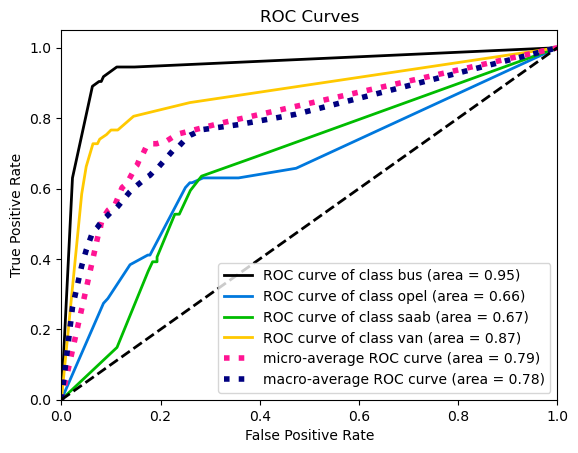

In [105]:
estimators = [('scaler1', StandardScaler()),
              ('pca', PCA(n_components=9)),
              ('scaler2', StandardScaler()),
              ('tree_cl', DecisionTreeClassifier(max_depth = 8))]

pipe1 = Pipeline(estimators)
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test)
y_proba = pipe1.predict_proba(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'f1 score: {f1}')
print(f'accuracy: {accuracy}')

skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [12]:
from sklearn.ensemble import BaggingClassifier
from tqdm.auto import tqdm

  0%|          | 0/20 [00:00<?, ?it/s]

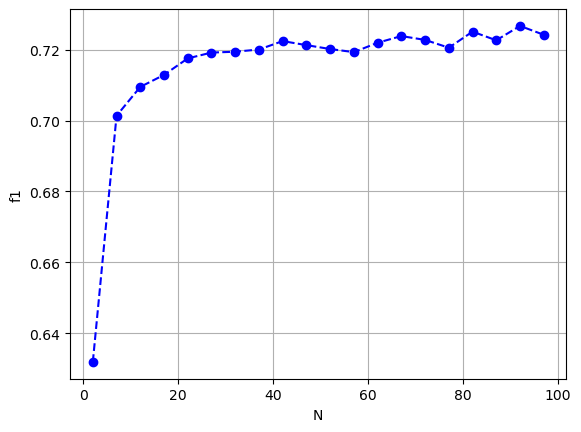

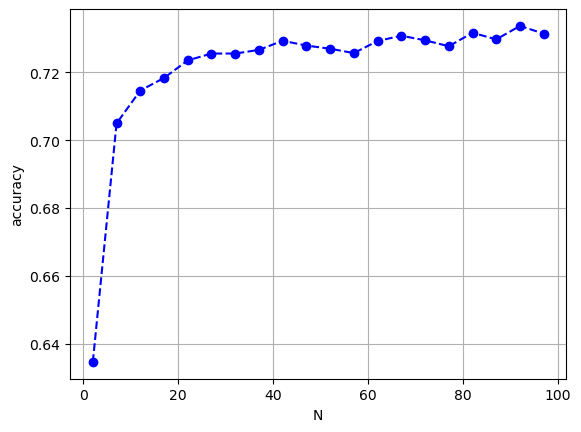

In [15]:
N_min = 2
N_max = 100
step = 5

N_ave = 50

N_arr = []
f1_arr = []
accuracy_arr = []
f1 = 0
accuracy = 0
for N in tqdm(range(N_min, N_max, step)):
    f1 = 0
    accuracy = 0
    for i in range(N_ave):
        estimators = [
             ('scaler1', StandardScaler()),
             ('reduce_dim', PCA(n_components=9)),
             ('scaler2', StandardScaler()),
             ('cl', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8), n_estimators=N, n_jobs = 8))]
        pipe = Pipeline(estimators)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        f1 += f1_score(y_test, y_pred, average='weighted')
        accuracy += accuracy_score(y_test, y_pred)
    
    N_arr.append(N)
    accuracy_arr.append(accuracy/N_ave)
    f1_arr.append(f1/N_ave)

    
plt.plot(N_arr, f1_arr, 'bo')
plt.plot(N_arr, f1_arr, 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()
plt.show()

plt.plot(N_arr, accuracy_arr, 'bo')
plt.plot(N_arr, accuracy_arr, 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Вначале accuracy быстро растет и в районе N = 30 выходит на плато. Поэтому для хорошей точности классификации и большей скорости обучения достаточно брать 30-32 деревьев.

Максимальная глубина найденная для одного дерева в п. 2.5 может быть не оптимальной для ансамбля деревьев, поскольку в случае ансамбля и количество деревьев, и их глубина повышают точность модели. Это означает, что в ансамбле глубину деревьев можно взять меньше, т.к. точность компенсируется за счет наличия целого ансамбля деревьев. Однако, для ансамбля деревьев все равно нужно проводить оценку как наиболее оптимального количества деревьев, так и оптимальной глубины. При чем делать это нужно совместно, т.к. эти парметры связаны.

Повторим тоже самое для логистической регрессии

  0%|          | 0/20 [00:00<?, ?it/s]

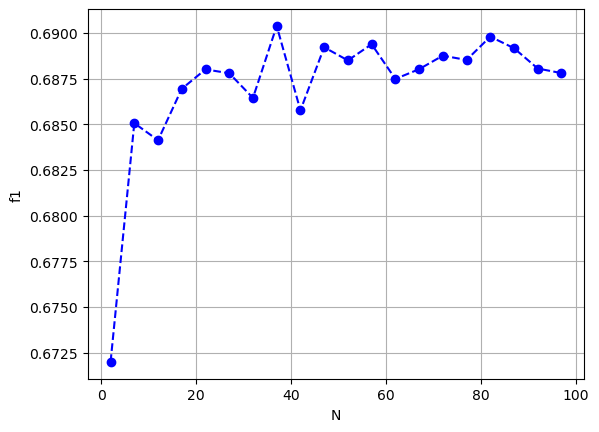

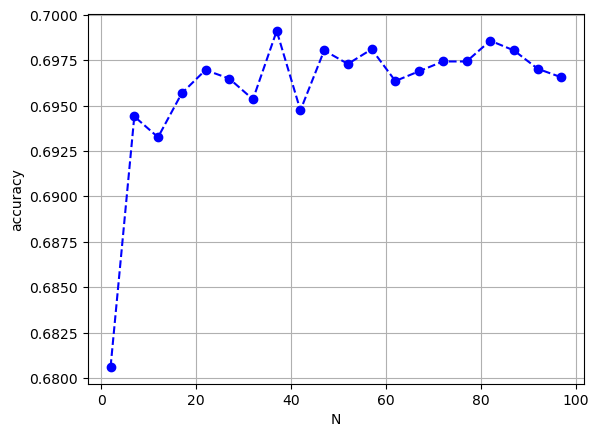

In [19]:
N_min = 2
N_max = 100
step = 5

N_ave = 50

N_arr = []
f1_arr = []
accuracy_arr = []
f1 = 0
accuracy = 0
for N in tqdm(range(N_min, N_max, step)):
    f1 = 0
    accuracy = 0
    for i in range(N_ave):
        estimators = [
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', BaggingClassifier(LogisticRegression(C = 5, 
                                                     fit_intercept = True,
                                                     penalty = 'l2',
                                                     multi_class='multinomial',
                                                     solver='saga',
                                                     tol=1e-2,
                                                     max_iter=1000),
                                  n_estimators=N, n_jobs = 8))]
        pipe = Pipeline(estimators)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        f1 += f1_score(y_test, y_pred, average='weighted')
        accuracy += accuracy_score(y_test, y_pred)
    
    N_arr.append(N)
    accuracy_arr.append(accuracy/N_ave)
    f1_arr.append(f1/N_ave)

    
plt.plot(N_arr, f1_arr, 'bo')
plt.plot(N_arr, f1_arr, 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()
plt.show()

plt.plot(N_arr, accuracy_arr, 'bo')
plt.plot(N_arr, accuracy_arr, 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Ансамбль логистических регрессий также выходит на плато. Оптимальное значений алгоритмов около 30-40.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [20]:
from sklearn.ensemble import RandomForestClassifier

  0%|          | 0/20 [00:00<?, ?it/s]

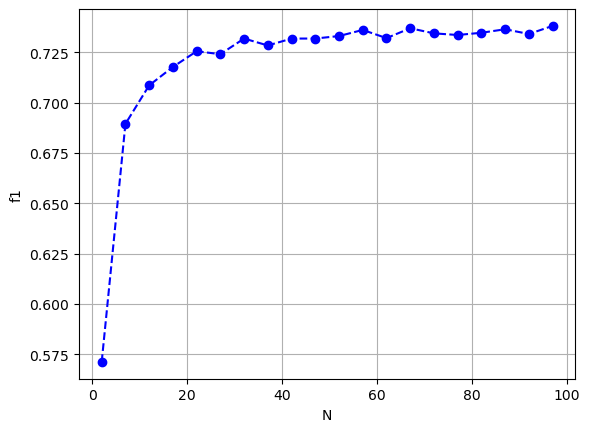

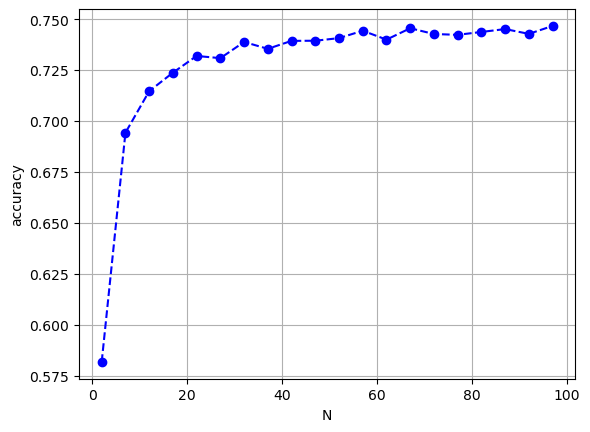

In [21]:
N_min = 2
N_max = 100
step = 5

N_ave = 50

N_arr = []
f1_arr = []
accuracy_arr = []
f1 = 0
accuracy = 0
for N in tqdm(range(N_min, N_max, step)):
    f1 = 0
    accuracy = 0
    for i in range(N_ave):
        estimators = [
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', RandomForestClassifier(n_estimators = N, n_jobs = 8))]
        pipe = Pipeline(estimators)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        f1 += f1_score(y_test, y_pred, average='weighted')
        accuracy += accuracy_score(y_test, y_pred)
    
    N_arr.append(N)
    accuracy_arr.append(accuracy/N_ave)
    f1_arr.append(f1/N_ave)

    
plt.plot(N_arr, f1_arr, 'bo')
plt.plot(N_arr, f1_arr, 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()
plt.show()

plt.plot(N_arr, accuracy_arr, 'bo')
plt.plot(N_arr, accuracy_arr, 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Обе оценки точности выходят на плато в районе N=30-40. Интересно, что оптимальное N для random forest близко к оптимальным N для Bagging classifier на основе деревьев и логистической регрессии.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [25]:
bag_tree_estimators = [
             ('scaler1', StandardScaler()),
             ('reduce_dim', PCA(n_components=9)),
             ('scaler2', StandardScaler()),
             ('cl', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8), n_estimators = 30, n_jobs = 8))
]
bag_tree_pipe = Pipeline(bag_tree_estimators)

bag_lr_estimators = [
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', BaggingClassifier(LogisticRegression(C = 5, 
                                                     fit_intercept = True,
                                                     penalty = 'l2',
                                                     multi_class='multinomial',
                                                     solver='saga',
                                                     tol=1e-2,
                                                     max_iter=1000),
                                  n_estimators = 30, n_jobs = 8))
]
bag_lr_pipe = Pipeline(bag_lr_estimators)


rndf_estimators = [
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', RandomForestClassifier(n_estimators = 30, n_jobs = 8))
]
rndf_pipe = Pipeline(rndf_estimators)

models = [bag_tree_pipe, bag_lr_pipe, rndf_pipe]

In [30]:
N_parts = 10
N_ave = 50

N_part_obj = int(len(y_train) / N_parts)

N_objects_arr = np.zeros(N_parts)
f1_arr = np.zeros((N_parts, len(models)))
accuracy_arr = np.zeros((N_parts, len(models)))
f1 = 0
accuracy = 0
for i in tqdm(range(N_parts)):
    X_train_part = X_train[:(i+1)*N_part_obj, :]
    y_train_part = y_train[:(i+1)*N_part_obj]
    
    for j in range(len(models)):
        f1 = 0
        accuracy = 0
        for k in range(N_ave):
            models[j].fit(X_train_part, y_train_part)
            y_pred = models[j].predict(X_test)
            
            f1 += f1_score(y_test, y_pred, average='weighted')
            accuracy += accuracy_score(y_test, y_pred)
        
        
        accuracy_arr[i, j] = accuracy/N_ave
        f1_arr[i, j] = f1/N_ave
    N_objects_arr[i] = (i+1)*N_part_obj


  0%|          | 0/10 [00:00<?, ?it/s]

### Bagging trees

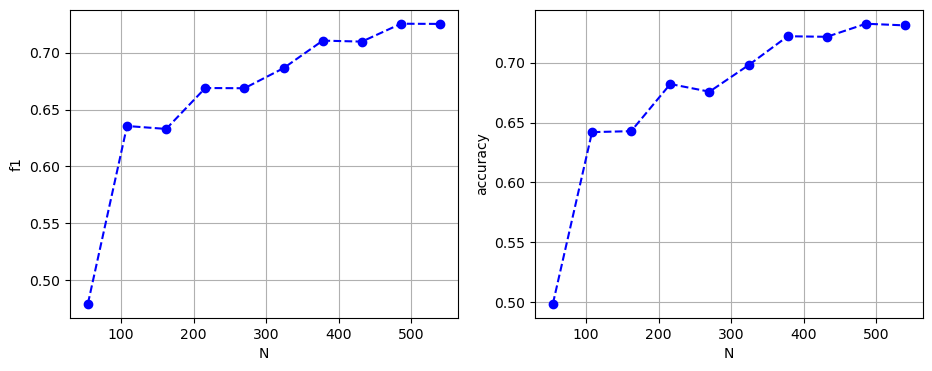

In [32]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(N_objects_arr, f1_arr[:, 0], 'bo')
plt.plot(N_objects_arr, f1_arr[:, 0], 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()

plt.subplot(122)
plt.plot(N_objects_arr, accuracy_arr[:, 0], 'bo')
plt.plot(N_objects_arr, accuracy_arr[:, 0], 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()

plt.show()

f1 и accuracy не выходят на плато и показывют монотонный рост с увеличением числа обучающих данных. Поэтому можно сделать вывод, что для данного алгоритма нужно брать >= 500 объектов тестовой выборки.

### Bagging logistic regression

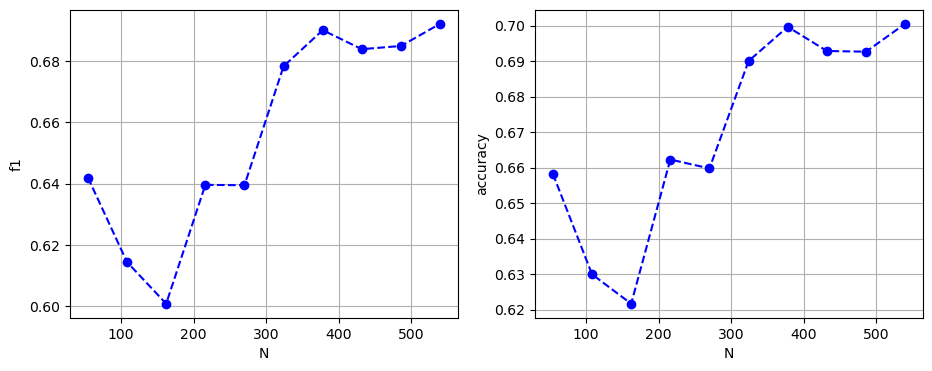

In [33]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(N_objects_arr, f1_arr[:, 1], 'bo')
plt.plot(N_objects_arr, f1_arr[:, 1], 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()

plt.subplot(122)
plt.plot(N_objects_arr, accuracy_arr[:, 1], 'bo')
plt.plot(N_objects_arr, accuracy_arr[:, 1], 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()

plt.show()

f1 и accuracy при маленьких трнировочных выборках ведут себя хаотично. При этом при N = 300-500 показывают точность занчительно не изменяется. Поэтому можно сделать вывод, что для данного алгоритма нужно брать N >= 300 объектов тестовой выборки.

### Random forest

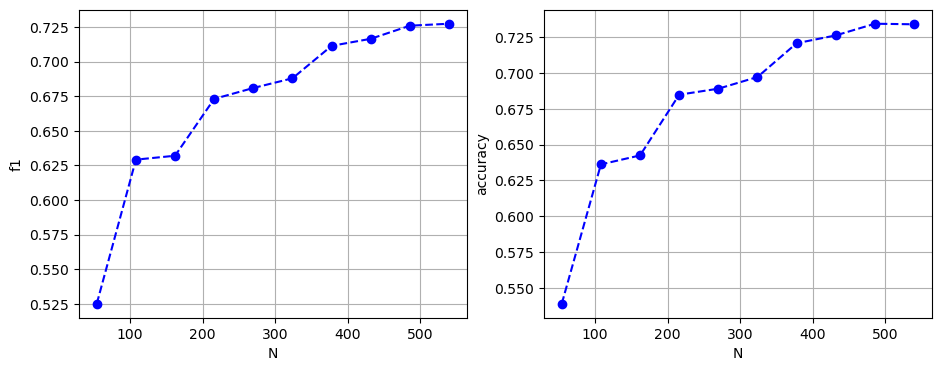

In [35]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(N_objects_arr, f1_arr[:, 2], 'bo')
plt.plot(N_objects_arr, f1_arr[:, 2], 'b--')
plt.xlabel('N')
plt.ylabel('f1')
plt.grid()

plt.subplot(122)
plt.plot(N_objects_arr, accuracy_arr[:, 2], 'bo')
plt.plot(N_objects_arr, accuracy_arr[:, 2], 'b--')
plt.xlabel('N')
plt.ylabel('accuracy')
plt.grid()

plt.show()

f1 и accuracy не выходят на плато и показывют монотонный рост с увеличением числа обучающих данных. Поэтому можно сделать вывод, что для данного алгоритма нужно брать N >= 500 объектов тестовой выборки.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [8]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [19]:
xgbc_estimators = [
         #('encoder', LabelEncoder()),
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', XGBClassifier(objective='multi:softprob'))
]

grid_xgbc_pipe = Pipeline(xgbc_estimators)

param_grid = {
    'cl__n_estimators': np.arange(2, 100+2, 2)}

grid_search = GridSearchCV(grid_xgbc_pipe, param_grid, n_jobs = 8)

grid_search.fit(X_train, y_train_encoded)
results_lr = pd.DataFrame(grid_search.cv_results_)
#results_lr.to_csv('results_lr.csv')
grid_search.best_params_

{'cl__n_estimators': 88}

In [20]:
xgbc_estimators = [
         #('encoder', LabelEncoder()),
         ('scaler1', StandardScaler()),
         ('reduce_dim', PCA(n_components=9)),
         ('scaler2', StandardScaler()),
         ('cl', XGBClassifier(n_estimators = 26, objective='multi:softprob'))
]

xgbc_pipe = Pipeline(xgbc_estimators)
xgbc_pipe.fit(X_train, y_train_encoded)
y_pred = xgbc_pipe.predict(X_test)

f1 = f1_score(y_test_encoded, y_pred, average='weighted')
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f'f1 score: {f1}')
print(f'accuracy: {accuracy}')

f1 score: 0.725335412260431
accuracy: 0.7306397306397306


Grid search показал, что оптимальное число деревьев 88.